In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [0]:
import tensorflow as tf
from tensorflow import keras
dataset = keras.datasets.mnist

In [0]:
(X_train_f, Y_train_f), (X_test_f, Y_test_f) = dataset.load_data()

In [65]:
# Lấy toàn bộ dữ liệu từ keras (train: 60000 - test:)
print(X_train_f.shape[0],'train sample')
print(X_test_f.shape[0],'test sample')

60000 train sample
10000 test sample


In [0]:
# Cắt lấy 1 phần bộ dữ liệu từ keras (train: 600 - test: 100)
X_train=X_train_f[:600,:]
Y_train = Y_train_f[:600]
X_test = X_test_f[:100, :]
Y_test = Y_test_f[:100]

# 1 ảnh là 1 ma trận trọng số - ảnh càng rõ, màu (phân biệt) càng nổi bật
# Định dạng ảnh : 28x28 -> train: 600x28x28 ; test: 100x28x28

In [56]:
# nhãn test (số thực tế đc phân tách từ ảnh) 
Y_train
# Problem: Cần thống kê dữ liệu 
# (thống kê sl số xuất hiện có đc phân bố đều hay k)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

In [0]:
# Thống kê sl số xuất hiện trên toàn bộ tập dữ liệu (tập FULL)
stat_train = dict()
for i in Y_train_f:
  if i in stat_train: 
    stat_train[i] +=1
  else:
    stat_train[i]=1

stat_test = dict()
for i in Y_test_f:
  if i in stat_test: 
    stat_test[i] +=1
  else:
    stat_test[i]=1

In [58]:
# Sort các dict của tập train theo giá trị bên trong (values)
for i in sorted (stat_train):
  print ((i,stat_train[i]),end='')

(0, 5923)(1, 6742)(2, 5958)(3, 6131)(4, 5842)(5, 5421)(6, 5918)(7, 6265)(8, 5851)(9, 5949)

In [59]:
# Sort các dict của tập test theo giá trị bên trong (values)
for i in sorted (stat_test):
  print ((i,stat_test[i]),end='')

(0, 980)(1, 1135)(2, 1032)(3, 1010)(4, 982)(5, 892)(6, 958)(7, 1028)(8, 974)(9, 1009)

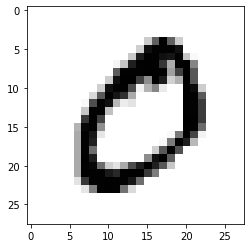

In [68]:
# Visualize
t = X_train[1, :] 
plt.imshow(t, cmap = plt.get_cmap('gray_r'))


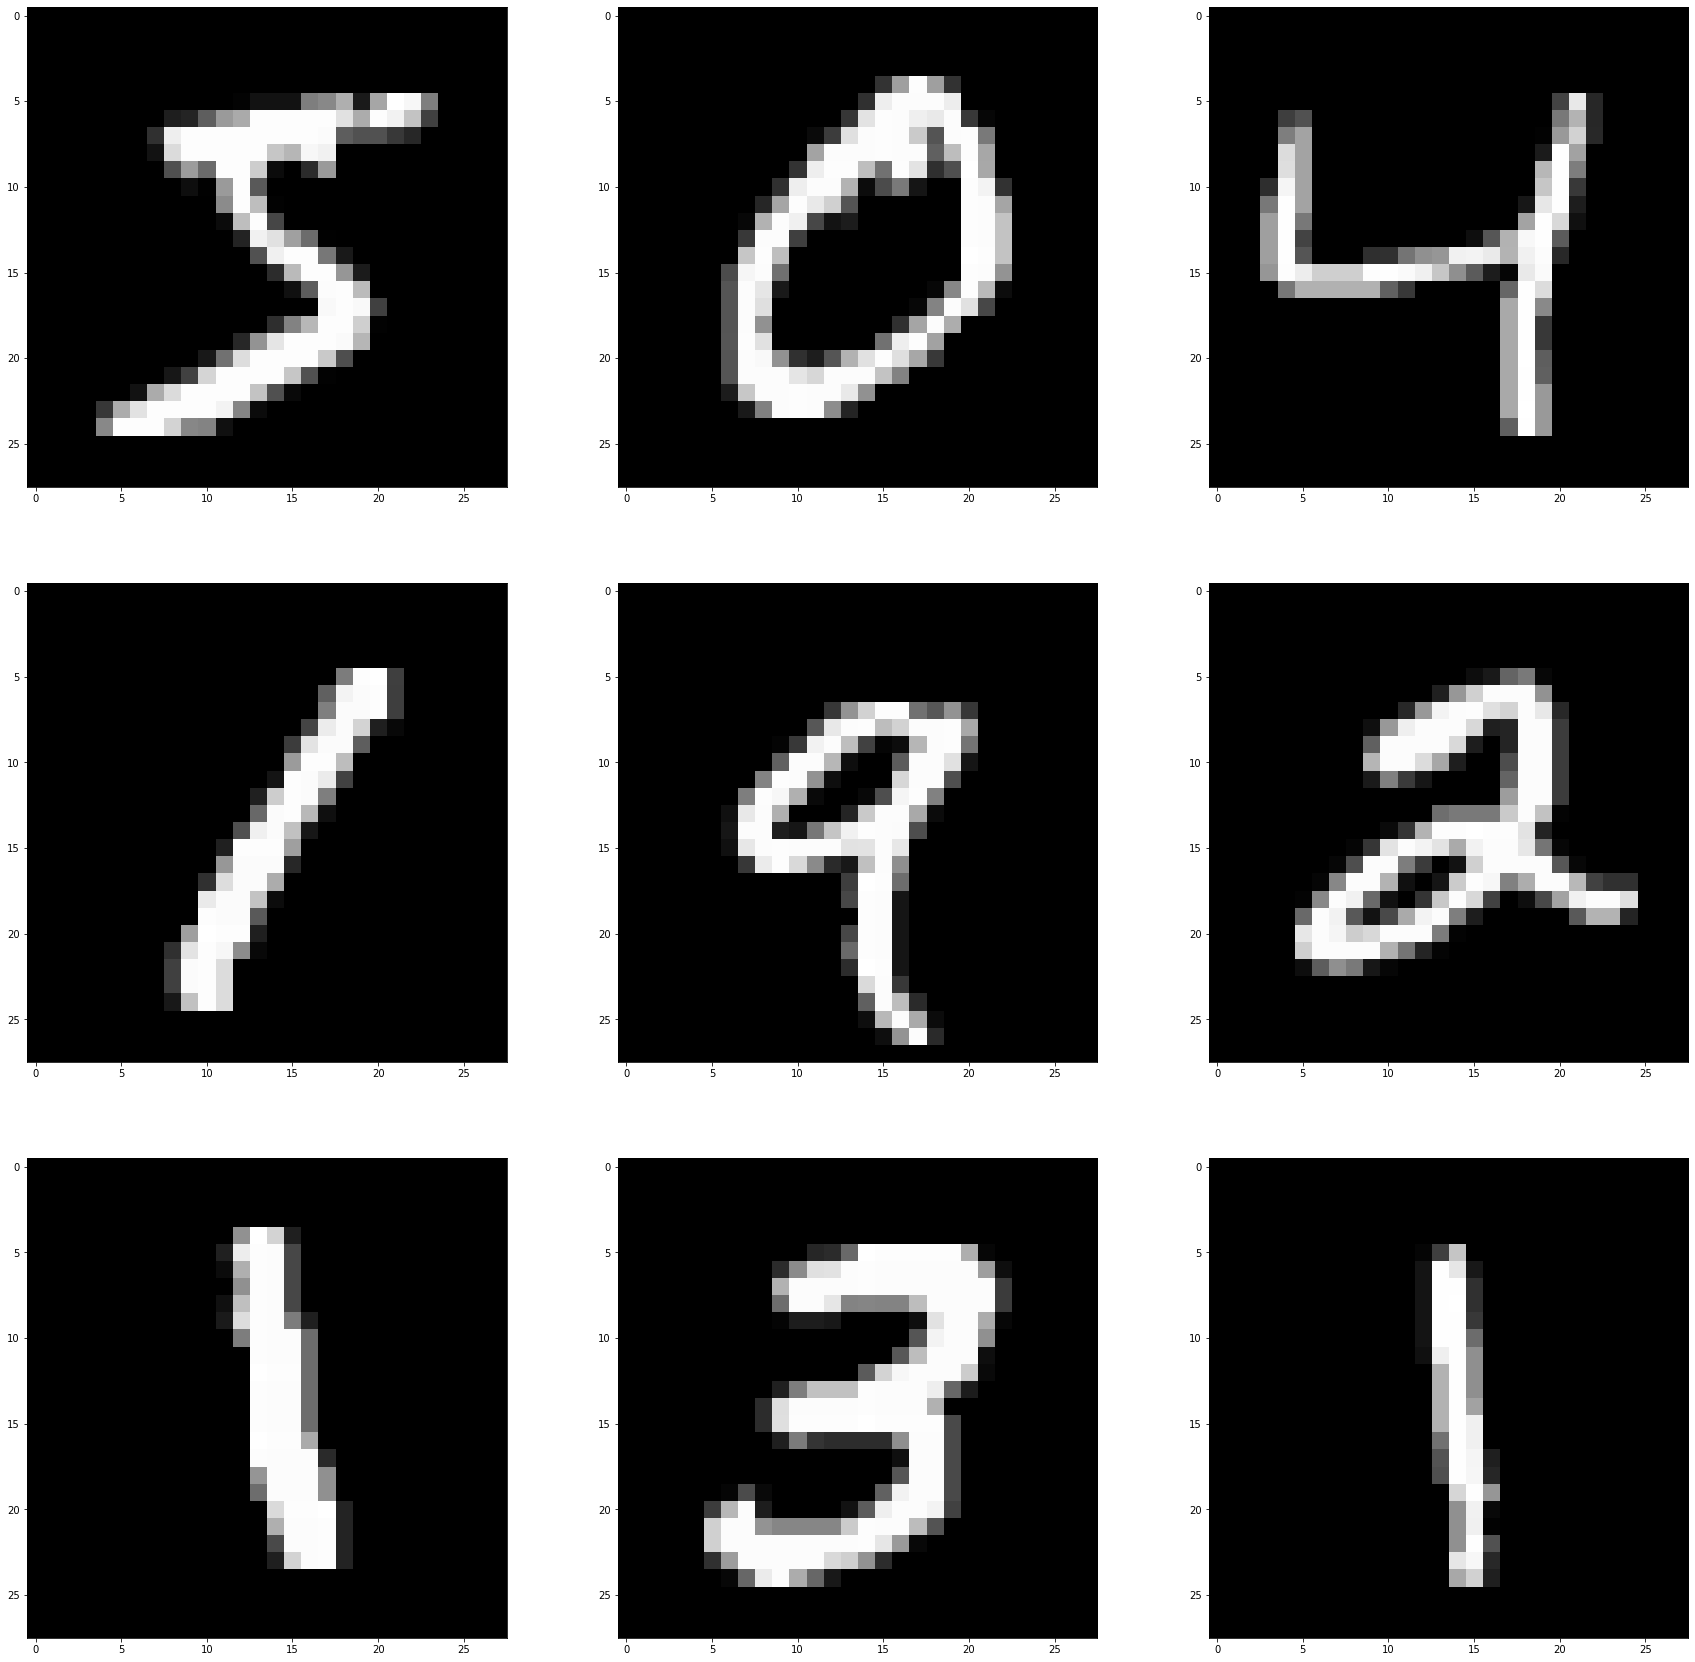

In [70]:
# Visualize matrix 3x3 (orderly)
plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],cmap='gray')
plt.show()  

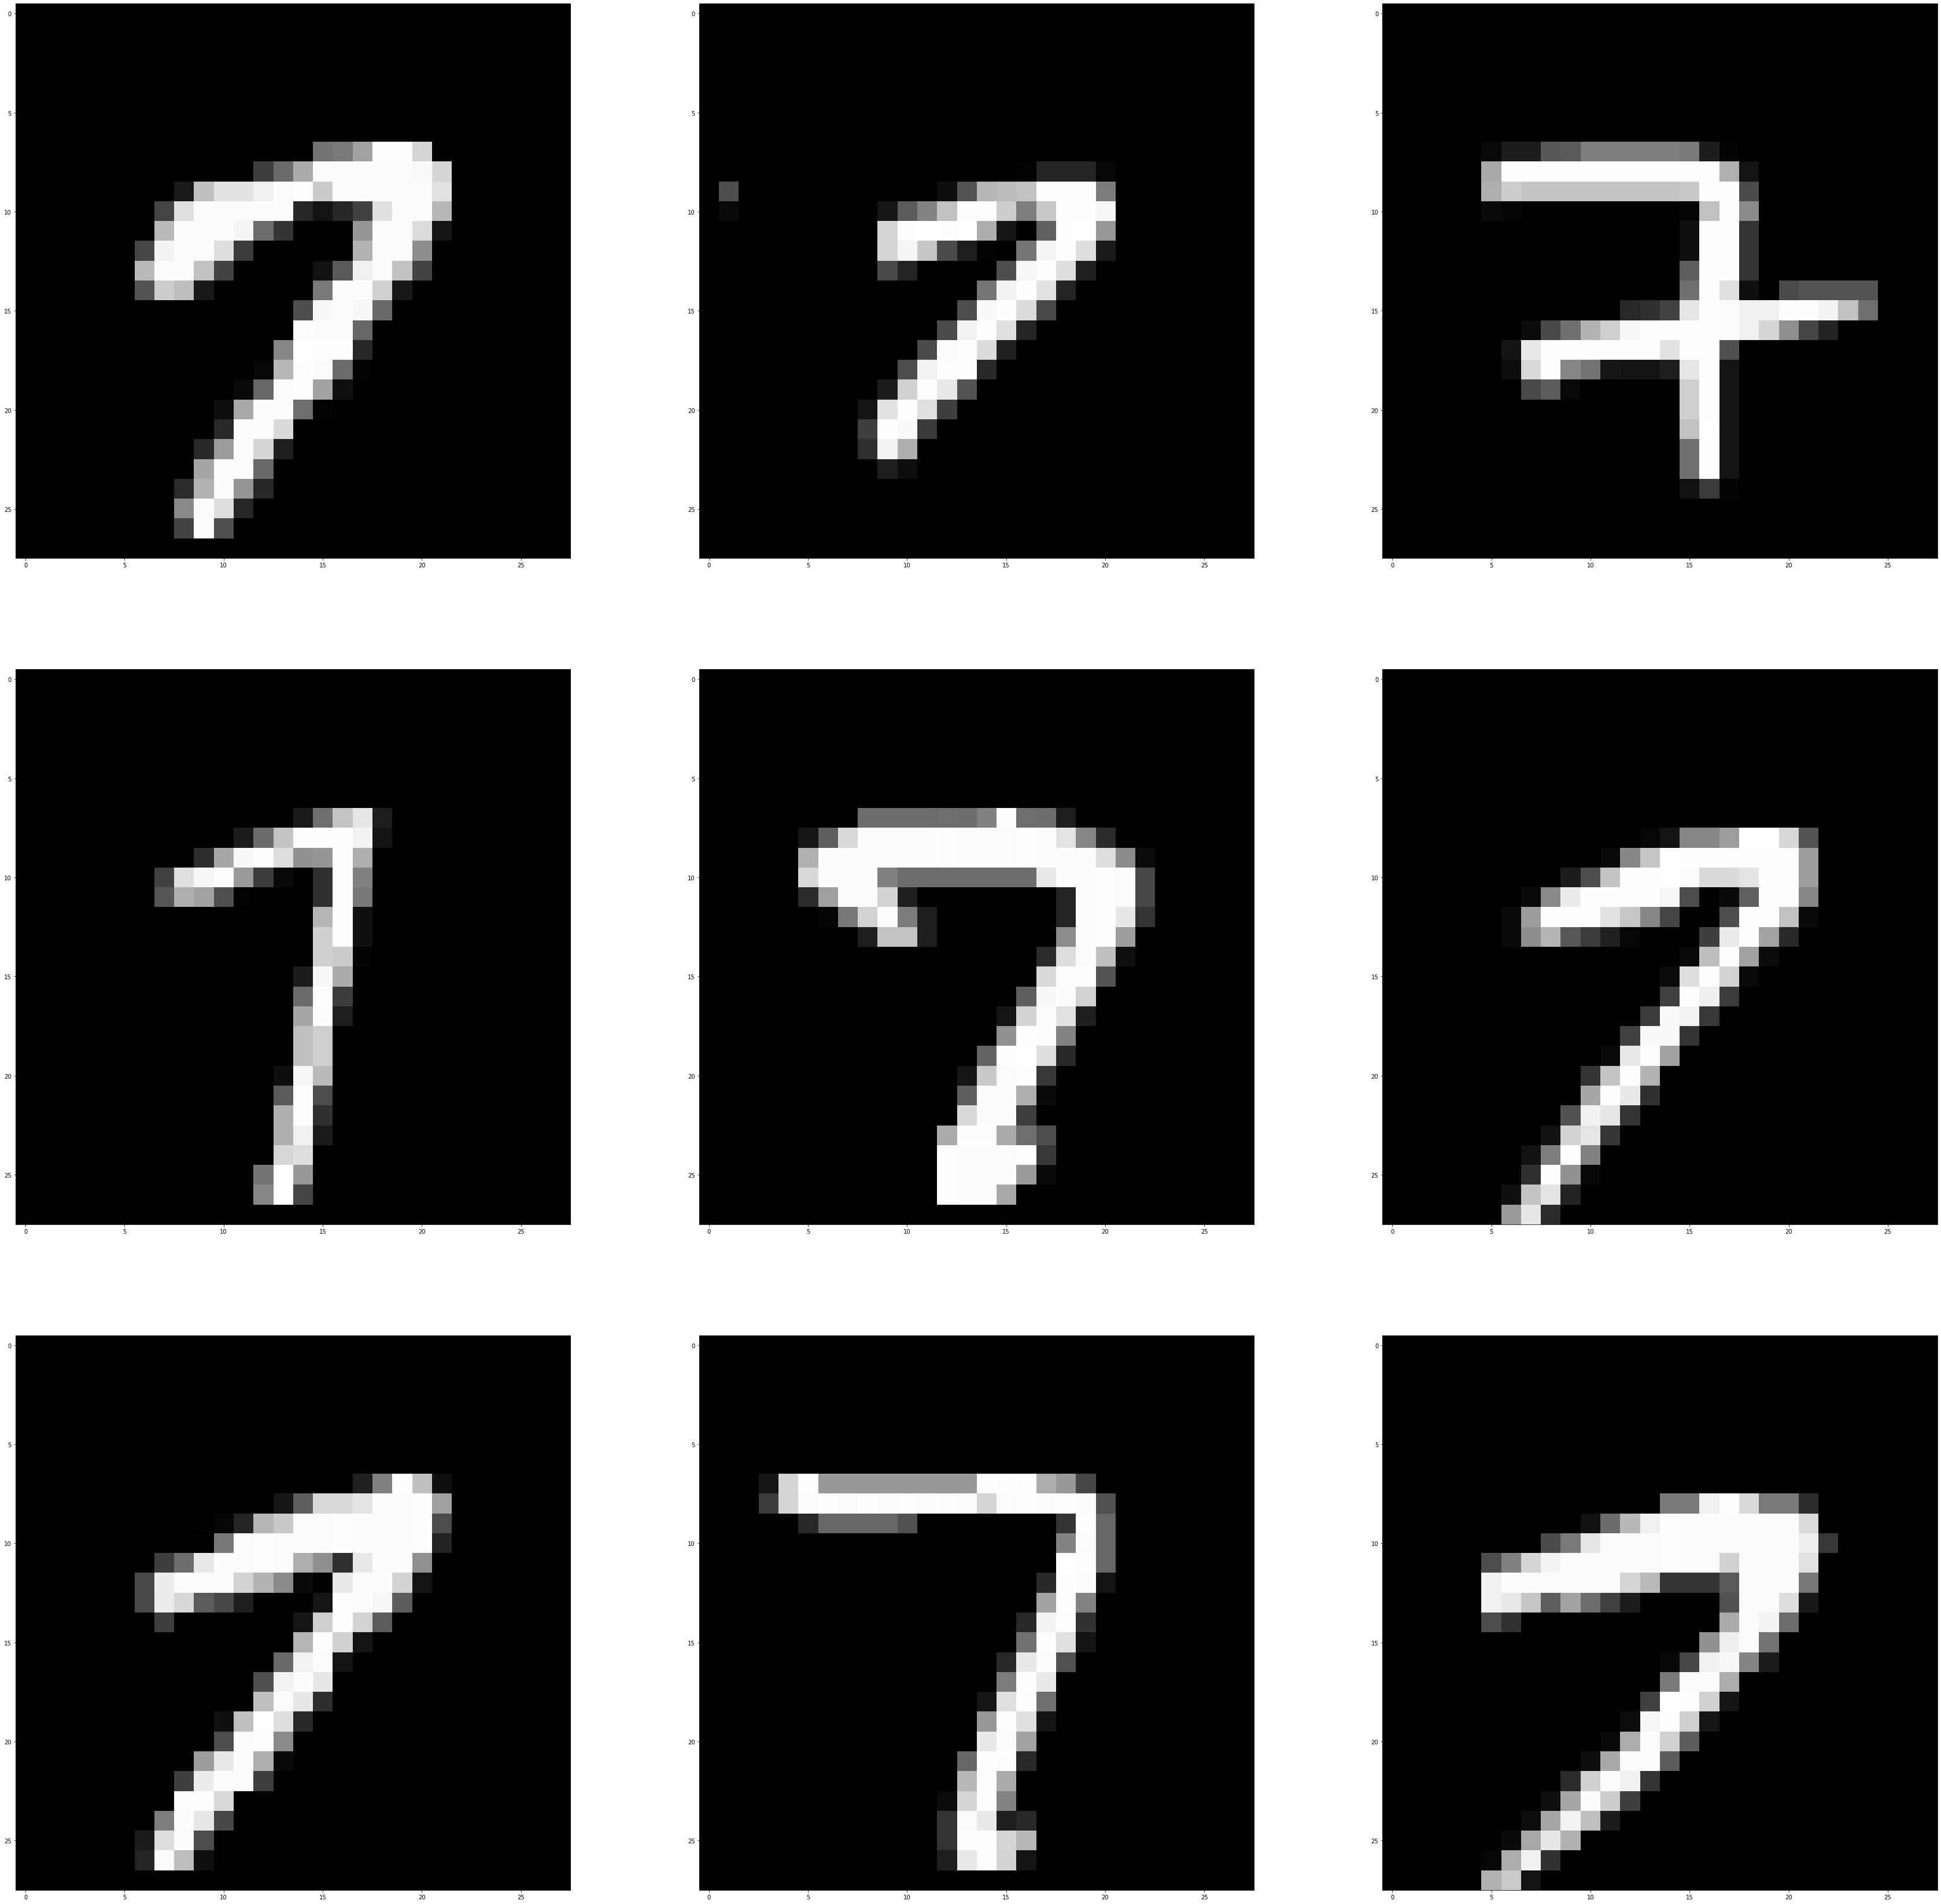

In [71]:
# Visualize matrix 3x3 (number=7)
plt.figure(figsize=(60,60))
pics7_indices = np.where(Y_train == 7)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[pics7_indices[0][i]],cmap='gray')
plt.show()

In [0]:
# Preprocessing - Trainning data
X_train = X_train.reshape(600, -1)
X_test = X_test.reshape(100, -1)

SC = StandardScaler()
X_train = SC.fit_transform(X_train)    
X_test = SC.transform(X_test)

In [64]:
k = [1, 3, 5, 7]
distance = ["minkowski", "euclidean", "cosine"]
for j in distance:
  acc = []
  acc1 = []
  print("\n===========" + j + " distance=============")
  for i in k:
      classifier = KNeighborsClassifier(n_neighbors= i, metric = j)
      classifier.fit(X_train, Y_train)
      cm = confusion_matrix(Y_train, classifier.predict(X_train))
      cm1 = confusion_matrix(Y_test, classifier.predict(X_test))
      print("Confusion matrix: k = " + str(i) + "\nTrain\n", cm, "\nTest\n", cm1)
      acc.append(accuracy_score(Y_train, classifier.predict(X_train)))
      acc1.append(accuracy_score(Y_test, classifier.predict(X_test)))
  print("\nAccuracy:", acc)
  print("Accuracy:", acc1)


===========minkowski distance=============
Confusion matrix: k = 1
Train
 [[58  0  0  0  0  0  0  0  0  0]
 [ 0 79  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  0  0  0]
 [ 0  0  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 62  0  0]
 [ 0  0  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  0 65]] 
Test
 [[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  1  0  0  0  0  0  0]
 [ 0  0  1  9  0  1  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  1  0  1  1  4  0  0  0  0]
 [ 2  0  1  0  0  0  7  0  0  0]
 [ 0  0  1  0  0  0  0 10  0  4]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  9]]
Confusion matrix: k = 3
Train
 [[57  0  0  0  0  0  1  0  0  0]
 [ 0 77  0  1  0  0  0  0  0  1]
 [ 0  8 51  0  0  0  1  2  2  0]
 [ 0  2  1 54  0  2  0  0  0  0]
 [ 1  1  0  0 54  0  0  1  0  2]
 [ 1  2  0  2  0 43  1  0  1  1]
 [ 0  2  1  0  0  0 51  0  